In [1]:
import bnpy
import numpy as np
import util

In [2]:
alloc_model = 'FiniteHMM'
obs_model = 'AutoRegGauss'
learn_alg = 'VB'
out_path = 'experiments/mocap-newargs'
dataset_title = 'MoCap6'

# Load data

In [3]:
dataset = util.load_mocap_data()

# Run experiment

In [7]:
K = 20
kwargs = {
    'ECovMat': 'diagcovfirstdiff',
    'sF': 0.5,
    'VMat': 'same',
    'sV': 0.5,
    'MMat': 'eye'
}

experiment = util.run_experiment(dataset, alloc_model, obs_model, learn_alg, K, out_path, **kwargs)

Training dense model
Dataset Summary:
GroupXData
  size: 6 units (documents)
  dimension: 12
Allocation Model:  None
Obs. Data  Model:  Auto-Regressive Gaussian with full covariance.
Obs. Data  Prior:  MatrixNormal-Wishart on each mean/prec matrix pair: A, Lam
  E[ A ] = 
  [[ 1.  0.]
   [ 0.  1.]] ...
  E[ Sigma ] = 
  [[ 0.14990727  0.        ]
   [ 0.          3.65403627]] ...
Initialization:
  initname = randexamples
  K = 20 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: VB | task  1/5 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: experiments/mocap-newargs/dense/1
        1/500 after      0 sec. |    151.6 MiB | K   20 | loss  2.632934182e+00 |  
        2/500 after      1 sec. |    151.8 MiB | K   20 | loss  2.395465918e+00 | Ndiff   61.088 
       25/500 after      6 sec. |    152.3 MiB | K   20 | loss  2.221555057e+00 | Ndiff    1.647 
       50/500 after     12 sec. |    152.5 MiB | K   20 | loss  2.219130524e+00 | Ndiff    0.035 


       75/500 after     29 sec. |    197.0 MiB | K   20 | loss  2.206399659e+00 | Ndiff    1.700 
       87/500 after     33 sec. |    197.0 MiB | K   20 | loss  2.206282748e+00 | Ndiff    0.000 
... done. converged.
Training sparse model L = 5
Learn Alg: VB | task  3/1 | alg. seed: 6168832 | data order seed: 7360256
task_output_path: experiments/mocap-newargs/sparse-L=5/3
        1/500 after      0 sec. |    204.3 MiB | K   20 | loss  2.707747109e+00 |  
        2/500 after      1 sec. |    204.3 MiB | K   20 | loss  2.468299830e+00 | Ndiff   82.098 
       25/500 after      9 sec. |    204.4 MiB | K   20 | loss  2.212140431e+00 | Ndiff    1.110 
       50/500 after     18 sec. |    204.5 MiB | K   20 | loss  2.210232627e+00 | Ndiff    0.051 
       75/500 after     27 sec. |    204.6 MiB | K   20 | loss  2.206983589e+00 | Ndiff    1.807 
       91/500 after     32 sec. |    204.6 MiB | K   20 | loss  2.206821263e+00 | Ndiff    0.000 
... done. converged.
Training "blocked" model L = 

# Plot results

In [8]:
# Load results if necessary
try:
    experiment
except NameError:
    experiment = util.load_experiment(out_path)

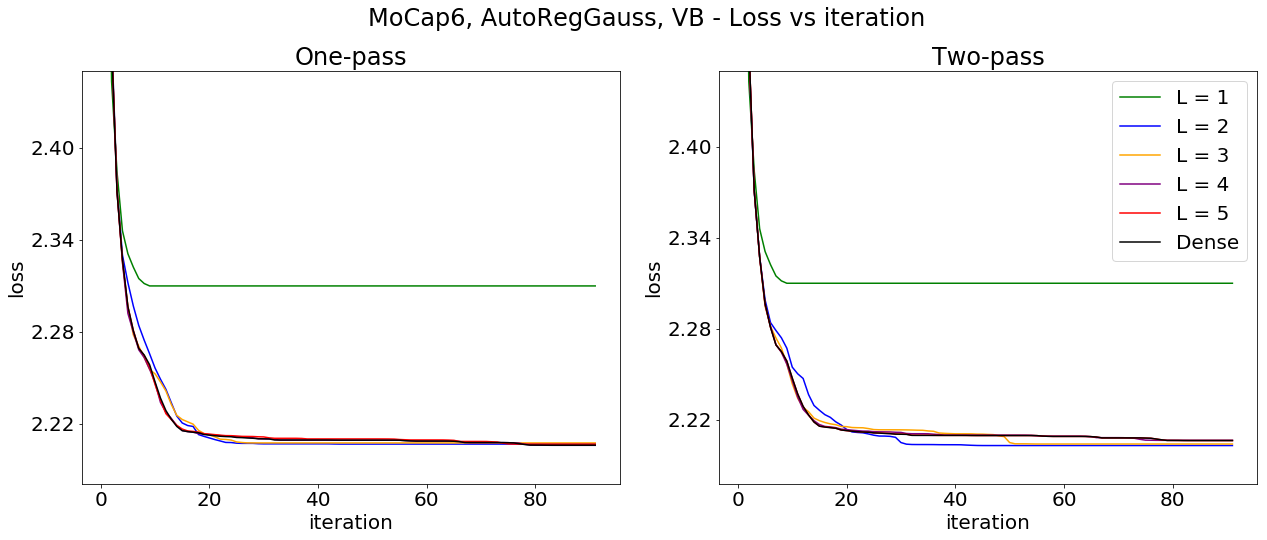

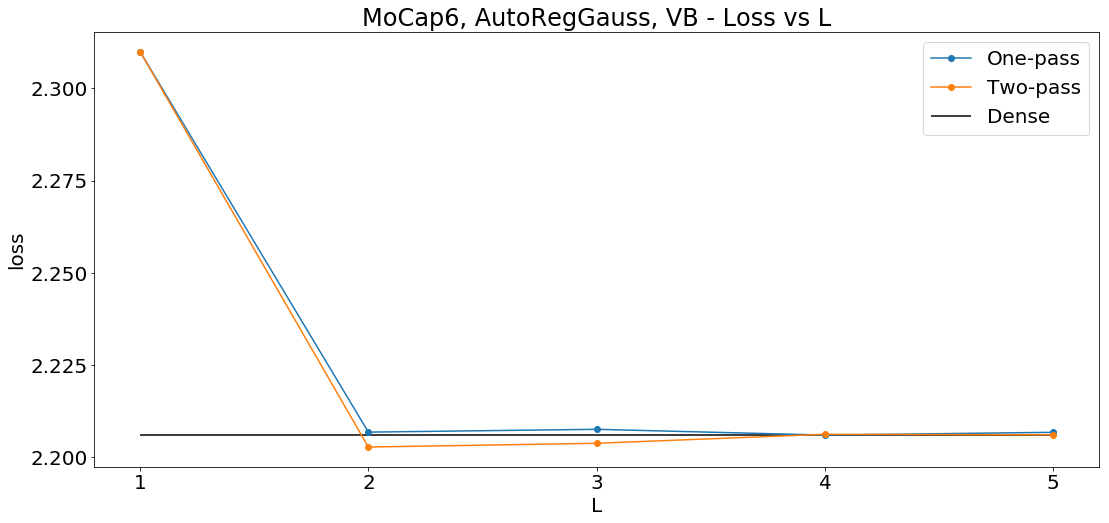

In [16]:
util.plot_loss(experiment, dataset_title, ymax=2.45)

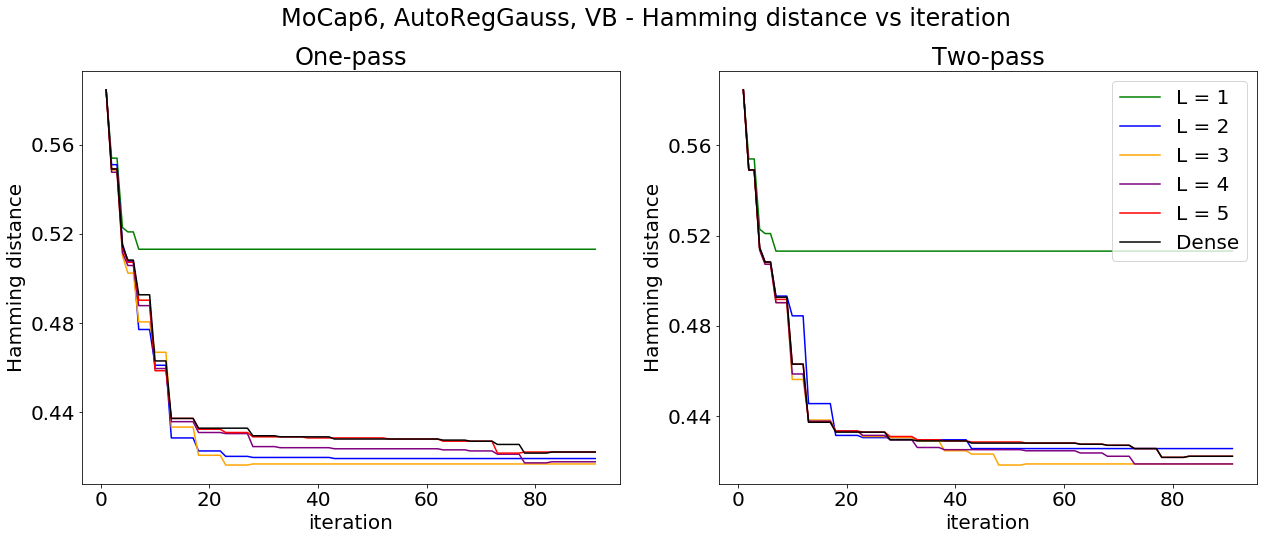

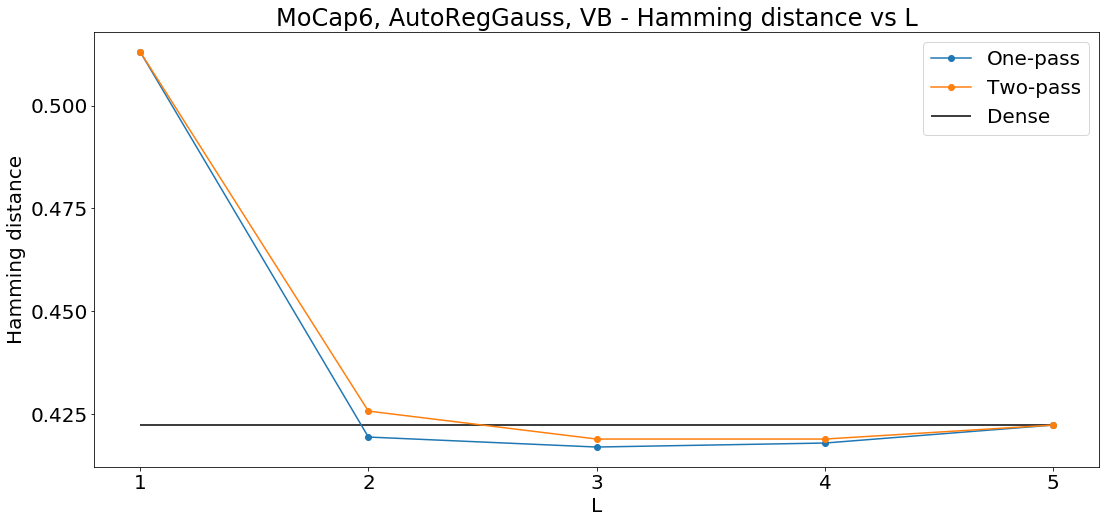

In [17]:
util.plot_hamming(experiment, dataset_title)

In [ ]:
len(dataset.TrueParams['Z'])

In [ ]:
import os
dataset_path = os.path.join(bnpy.DATASET_PATH, 'mocap6')
dataset1 = bnpy.data.GroupXData.read_npz(
    os.path.join(dataset_path, 'dataset.npz'))

In [ ]:
dataset1.TrueParams['Z']

In [ ]:
dataset1.doc_range